In [41]:
from standardInclude import *

In [42]:
inputFiles = [ ["All Triples", "mipEnergyCalibration_PostDisk_AllTriples.fcl"],
             ["Coin. 1", "mipEnergyCalibration_PostDisk_CoincidenceNumber_1.fcl"],
             ["Coin. 2", "mipEnergyCalibration_PostDisk_CoincidenceNumber_2.fcl"],
             ["Coin. 3", "mipEnergyCalibration_PostDisk_CoincidenceNumber_3.fcl"],
             ["Coin. 4", "mipEnergyCalibration_PostDisk_CoincidenceNumber_4.fcl"],
             #["Coin. 3", ".fcl"]
             ]

In [43]:
fclParams = {}
for name, file in inputFiles:
    fclParams[name] = fclReader(file)
    
allParamsList = {}
for fcl in fclParams:
    print(fcl)
    params = []
    for calo in range(1,25):
        for xtal in range(54):
            #print(fclParams[fcl]['absolute_calibration_constants']['calo'+str(calo)]['xtal'+str(xtal)])
            params.append( fclParams[fcl]['absolute_calibration_constants']['calo'+str(calo)]['xtal'+str(xtal)] )
    allParamsList[fcl] = params
#print(fclParams)
#print(params)

All Triples
Coin. 1
Coin. 2
Coin. 3
Coin. 4


In [44]:
fclDiffs = {}
takenPairs = []
for fcl1 in allParamsList:
    for fcl2 in allParamsList:
        if(fcl1 != fcl2 and (fcl2, fcl1) not in takenPairs and (fcl1, fcl2) not in takenPairs):
            takenPairs.append((fcl1,fcl2))
            print(fcl1,fcl2)
            diff = [x-y for x,y in zip(allParamsList[fcl1], allParamsList[fcl2])]
            fclDiffs[fcl1+" - "+fcl2] = diff

All Triples Coin. 1
All Triples Coin. 2
All Triples Coin. 3
All Triples Coin. 4
Coin. 1 Coin. 2
Coin. 1 Coin. 3
Coin. 1 Coin. 4
Coin. 2 Coin. 3
Coin. 2 Coin. 4
Coin. 3 Coin. 4


In [67]:
fclDiffsSingleRef = {}
refKey = [x for x in allParamsList.keys()][0]
print(refKey)
takenPairs = []
fcl1 = refKey
for fcl2 in allParamsList:
    if(fcl1 != fcl2 and (fcl2, fcl1) not in takenPairs and (fcl1, fcl2) not in takenPairs):
        takenPairs.append((fcl1,fcl2))
        #print(fcl1,fcl2)
        diff = [x-y for x,y in zip(allParamsList[fcl1], allParamsList[fcl2])]
        fclDiffsSingleRef[fcl1+" - "+fcl2] = diff

All Triples


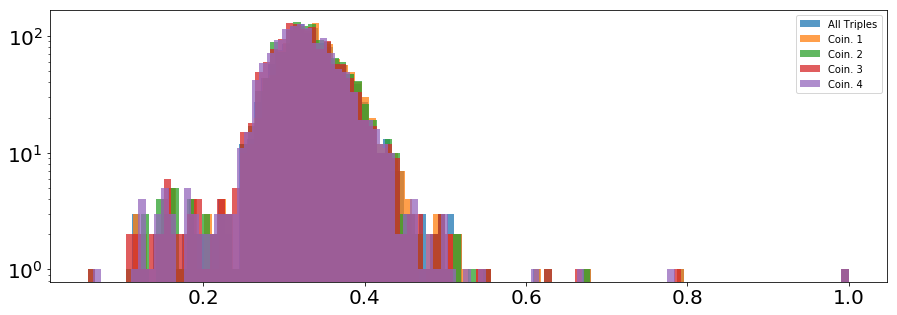

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
for fcl in allParamsList:
    plt.hist(allParamsList[fcl], bins=100, label=fcl, alpha=0.75)
plt.legend()
plt.yscale('log')
plt.show()

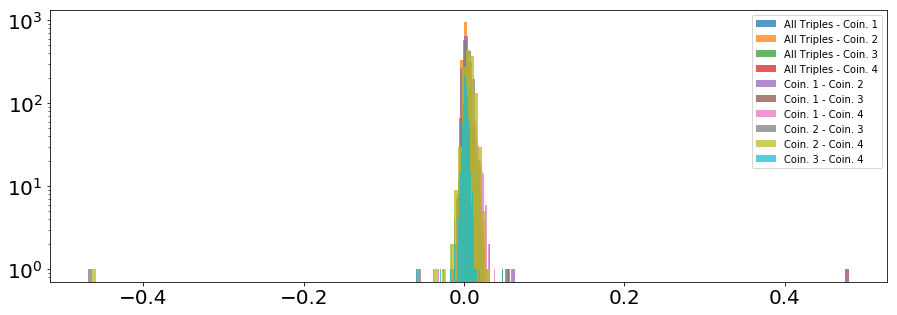

In [69]:
fig, ax = plt.subplots(figsize=(15,5))
for fcl in fclDiffs:
    plt.hist(fclDiffs[fcl], bins=100, label=fcl, alpha=0.75)
plt.legend()
plt.yscale('log')
plt.show()

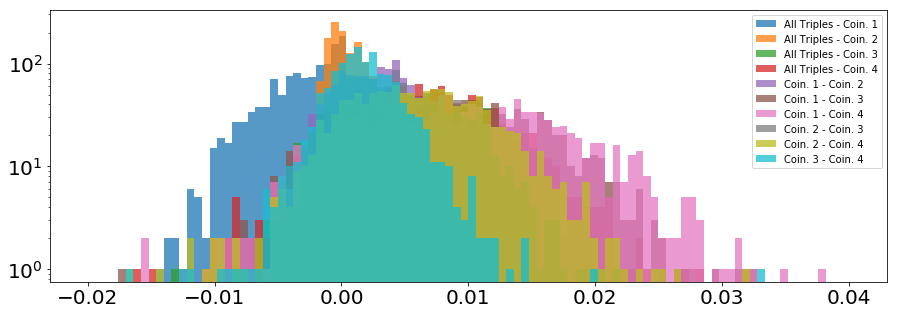

In [70]:
fig, ax = plt.subplots(figsize=(15,5))
for fcl in fclDiffs:
    plt.hist(fclDiffs[fcl], bins=100, label=fcl, alpha=0.75, range=(-0.02,0.04))
plt.legend()
plt.yscale('log')
plt.show()

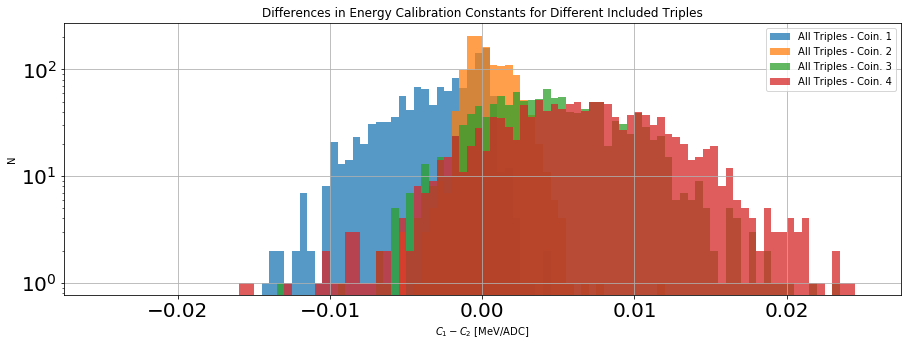

In [115]:
fig, ax = plt.subplots(figsize=(15,5))
for fcl in fclDiffsSingleRef:
    plt.hist(fclDiffsSingleRef[fcl], bins=100, label=fcl, alpha=0.75, range=(-0.025,0.025))
plt.legend()
plt.yscale('log')
plt.title("Differences in Energy Calibration Constants for Different Included Triples")
plt.xlabel(r"$C_{1} - C_{2}$ [MeV/ADC]")
plt.ylabel('N')
plt.grid()
plt.show()

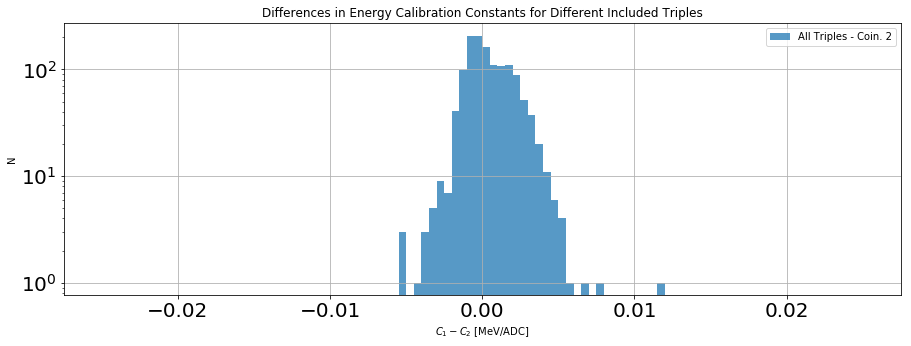

In [116]:
fig, ax = plt.subplots(figsize=(15,5))
fcl ='All Triples - Coin. 2'
plt.hist(fclDiffsSingleRef[fcl], bins=100, label=fcl, alpha=0.75, range=(-0.025,0.025))
plt.legend()
plt.yscale('log')
plt.title("Differences in Energy Calibration Constants for Different Included Triples")
plt.xlabel(r"$C_{1} - C_{2}$ [MeV/ADC]")
plt.ylabel('N')
plt.grid()
plt.show()

---

### What do these differences look like vs. xtal num?

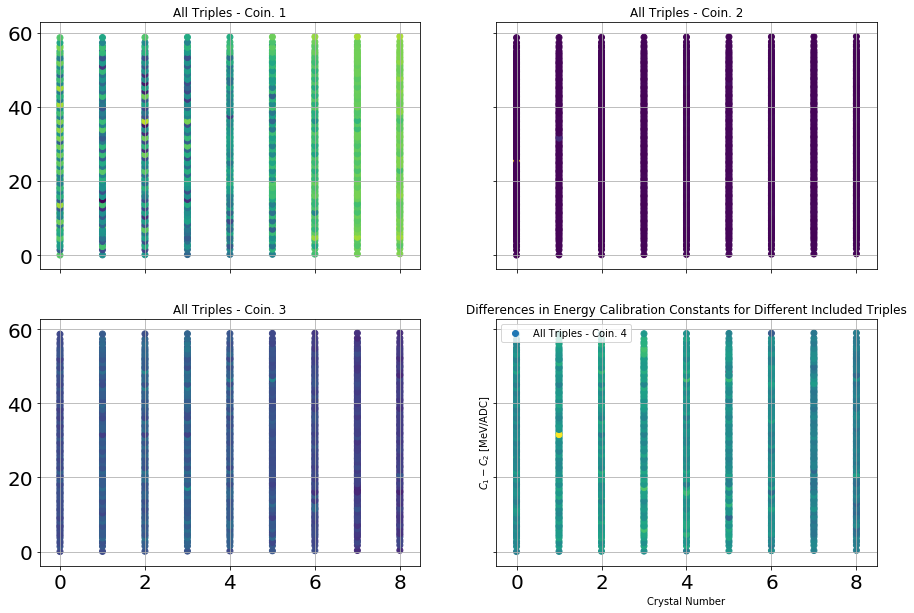

In [111]:
fig, ax = plt.subplots(2,2,figsize=(15,10), sharex=True, sharey=True)
axs = flatten2dArray(ax)
for i, fcl in enumerate(fclDiffsSingleRef):
    #axs[i].plot([x % 54 for x in range(len(fclDiffsSingleRef[fcl]))], fclDiffsSingleRef[fcl], ".", label = fcl)
    axs[i].scatter([x % 9 for x in range(len(fclDiffsSingleRef[fcl]))], 
                   [int(np.floor((x % 54)/9.))+x/24 for x in range(len(fclDiffsSingleRef[fcl]))],
                   c = fclDiffsSingleRef[fcl], 
                   label = fcl)
    #axs[i].set_ylim(-0.04,0.04)
    axs[i].set_title(fcl)
    axs[i].grid()
plt.legend(ncol=2)
#plt.yscale('log')
plt.title("Differences in Energy Calibration Constants for Different Included Triples")
plt.ylabel(r"$C_{1} - C_{2}$ [MeV/ADC]")
plt.xlabel('Crystal Number')
plt.show()